# Unicorn companies
A unicorn company according to [Investopia](https://www.investopedia.com/terms/u/unicorn.asp) refers to a privately held startup company with a value of over $1 billion. It is commonly used in the venture capital industry. The term was first popularized by venture capitalist Aileen Lee. Unicorns are very rare and require innovation. Because of their sheer size, unicorn investors tend to be private investors or venture capitalists, which means they are out of the reach of retail investors. Although it isn't necessary, many unicorns work their way to going public. 

Let's dive into a dataset provided by [DataCamp](https://app.datacamp.com/workspace/overview)

First we import the libraries that are needed for the exploration of the dataset

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then we look at the dataset for a better understanding of the information

In [104]:
df=pd.read_csv("unicorns.csv")
df

,company,country,continent,company_id,year_founded,year_joined,valuation,industry
0,Otto Bock HealthCare,Germany,Europe,189,1919,2017,4000000000,Health
1,Matrixport,Singapore,Asia,848,2019,2021,1000000000,Fintech
2,Cloudinary,United States,North America,556,2011,2022,2000000000,Internet software & services
3,PLACE,United States,North America,999,2020,2021,1000000000,Internet software & services
4,candy.com,United States,North America,396,2021,2021,2000000000,Fintech
...,...,...,...,...,...,...,...,...
1069,Poizon,China,Asia,1002,2015,2019,1000000000,Mobile & telecommunications
1070,SSENSE,Canada,North America,215,2003,2021,4000000000,E-commerce & direct-to-consumer
1071,Assembly,United States,North America,866,2019,2021,1000000000,Internet software & services
1072,Xiaobing,China,Asia,651,2020,2021,1000000000,Fintech


In [105]:
#Verifiy missing values
df.isnull().sum()

company         0
country         0
continent       0
company_id      0
year_founded    0
year_joined     0
valuation       0
industry        0
dtype: int64

In [106]:
#View descriptive stadistics
df.describe()

,company_id,year_founded,year_joined,valuation
count,1074.000000,1074.000000,1074.000000,1.074000e+03
mean,536.500000,2012.895717,2019.896648,3.455307e+09
std,310.181399,5.698573,2.001288,8.547022e+09
min,0.000000,1919.000000,2007.000000,1.000000e+09
25%,268.250000,2011.000000,2019.000000,1.000000e+09
50%,536.500000,2014.000000,2021.000000,2.000000e+09
75%,804.750000,2016.000000,2021.000000,3.000000e+09
max,1073.000000,2021.000000,2022.000000,1.800000e+11


In [107]:
# visualize the data types
df.dtypes

company         object
country         object
continent       object
company_id       int64
year_founded     int64
year_joined      int64
valuation        int64
industry        object
dtype: object

In [108]:
#For a more readable format of the valuation column, the commas are added
df["valuation"]=df["valuation"].map('{:,d}'.format)

Now it's time to see information about the companies

In [109]:
# We want to know the most valuable company, for that we filter by using the valuation feature of the dataset
most_valuable_company=df[df["valuation"]==df["valuation"].max()]
most_valuable_company

,company,country,continent,company_id,year_founded,year_joined,valuation,industry
449,Stripe,United States,North America,3,2010,2014,"95,000,000,000",Fintech


[ByteDance](https://www.bytedance.com/en/) is a technology company operating a range of content platforms that inform, educate, entertain and inspire people across languages, cultures, and geographies.

Dedicated to building global platforms of creation and interaction, ByteDance now has a portfolio of applications available in over 150 markets and 75 languages. For example, TikTok, Helo, Vigo Video, Douyin, and Huoshan.

ByteDance's platforms aim to help users explore and discover the world's creativity, knowledge and moments that matter in everyday life while empowering everyone to be a creator directly from their smartphones.

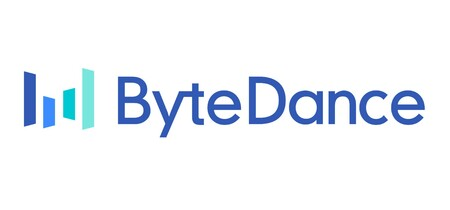

In [110]:
#Know we do the same with the less valuable unicorn companies
less_valuable_companies=df[df["valuation"]==df.valuation.min()]
print("Number of companies that are the less valuable: ",len(less_valuable_companies))
print("Amount of money that they're worth it:",df.valuation.min())

Number of companies that are the less valuable:  471
Amount of money that they're worth it: 1,000,000,000


There are 471 companies that have a valuation of 1B dollars. Which is the minimum valuation needed to be considered a unicorn company

<Figure size 720x864 with 0 Axes>

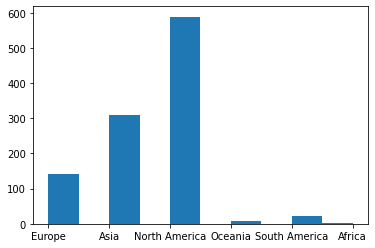

In [111]:
plt.hist(x=df["continent"])
plt.Figure(figsize=(10,12))

As we can see from this insight North America and South America are in two columns, which in my point of view is not correct, if we want to compare across continents, let's merge this values from **continents** into one

In [112]:
# let's create a function to fix this
def rename_cells(column,old_values,new_value):
    for i in range(len(old_values)):
        df[column]=df[column].replace(old_values[i],new_value)
    return df


In [113]:
rename_cells("continent",["North America","South America"],"America")
# To visualize if this has been fixes we use unique method from pandas
df.continent.unique()


array(['Europe', 'Asia', 'America', 'Oceania', 'Africa'], dtype=object)